In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import credit_data
import visualkeras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data()

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 3) (6818, 3)


In [3]:
model = models.Sequential()

model.add(layers.Dense(input_dim=67, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
model.compile(optimizer=optimizers.Adam(),
            loss=losses.categorical_crossentropy, 
            metrics=[metrics.categorical_accuracy])

In [5]:
history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)

Epoch 1/10
112/112 [==============================] - 3s 25ms/step - loss: 1.1481 - categorical_accuracy: 0.5848 - val_loss: 0.9052 - val_categorical_accuracy: 0.6415
Epoch 2/10
112/112 [==============================] - 3s 23ms/step - loss: 0.9185 - categorical_accuracy: 0.6341 - val_loss: 0.9008 - val_categorical_accuracy: 0.6555
Epoch 3/10
112/112 [==============================] - 3s 25ms/step - loss: 0.8788 - categorical_accuracy: 0.6581 - val_loss: 0.8630 - val_categorical_accuracy: 0.6635
Epoch 4/10
112/112 [==============================] - 2s 21ms/step - loss: 0.8525 - categorical_accuracy: 0.6701 - val_loss: 0.8726 - val_categorical_accuracy: 0.6572
Epoch 5/10
112/112 [==============================] - 3s 22ms/step - loss: 0.8411 - categorical_accuracy: 0.6753 - val_loss: 0.8419 - val_categorical_accuracy: 0.6783
Epoch 6/10
112/112 [==============================] - 3s 26ms/step - loss: 0.8305 - categorical_accuracy: 0.6768 - val_loss: 0.8738 - val_categorical_accuracy: 0.660

In [6]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

214/214 [==============================] - 2s 10ms/step - loss: 0.8286 - categorical_accuracy: 0.6817
loss (cross-entropy) : 0.8286137580871582
test accuracy : 0.6817249059677124


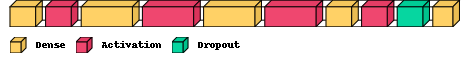

In [7]:
visualkeras.layered_view(model, legend=True)

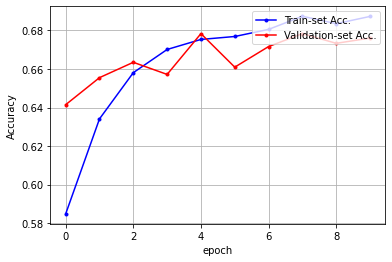

In [8]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()